In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [4]:
data=pd.read_csv('../housing.csv')

In [5]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
data.shape

(20640, 10)

In [7]:
data.select_dtypes('O').value_counts()

ocean_proximity
<1H OCEAN          9136
INLAND             6551
NEAR OCEAN         2658
NEAR BAY           2290
ISLAND                5
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [10]:
data.isnull().mean()

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        0.010029
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

<AxesSubplot:ylabel='Density'>

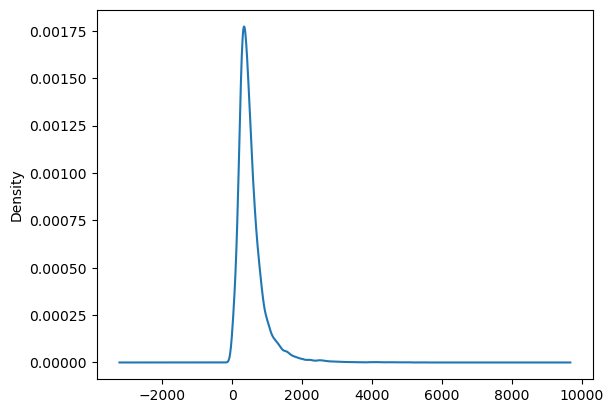

In [11]:
data['total_bedrooms'].plot(kind='kde')

In [12]:
data['total_bedrooms'].fillna(data['total_bedrooms'].mean(),inplace= True)

In [13]:
data.isnull().mean()

longitude             0.0
latitude              0.0
housing_median_age    0.0
total_rooms           0.0
total_bedrooms        0.0
population            0.0
households            0.0
median_income         0.0
median_house_value    0.0
ocean_proximity       0.0
dtype: float64

<AxesSubplot:>

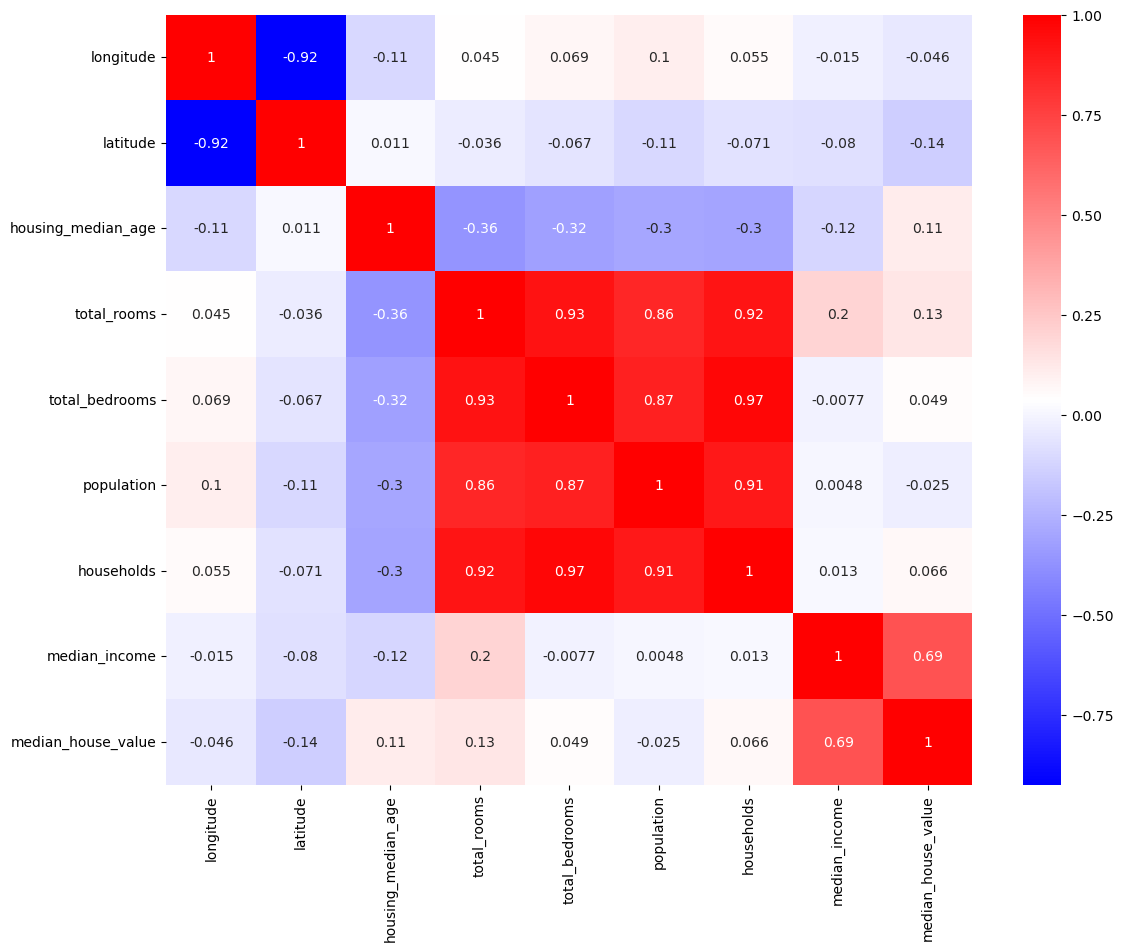

In [14]:
plt.figure(figsize=[13,10])
sns.heatmap(data.corr(), annot= True, cmap='bwr')

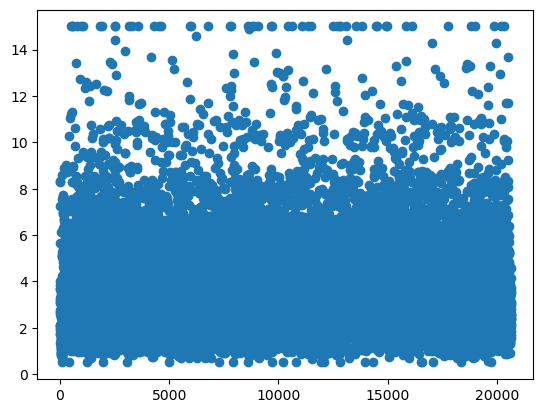

In [15]:
plt.scatter(range(data.shape[0]),data.median_income)

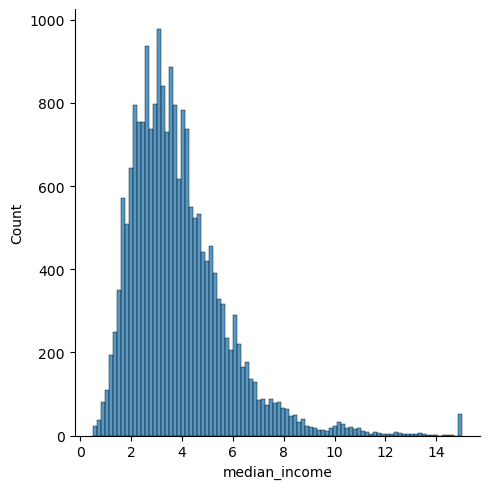

In [16]:
sns.displot(data.median_income)

<AxesSubplot:xlabel='median_income', ylabel='Density'>

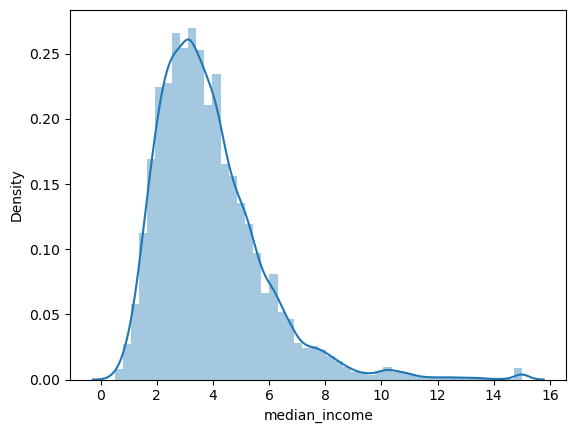

In [17]:
sns.distplot(data.median_income)

In [18]:
q1, q3=np.percentile(data.median_income,[25,75])

In [19]:
iqr=q3-q1
hf=q3+1.5*iqr

In [20]:
data=data[data.median_income < hf]

In [21]:
data.shape

(19959, 10)

In [22]:
data.reset_index(drop=True, inplace=True)

In [23]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
1,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
2,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
3,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
4,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY


In [24]:
data_d= pd.get_dummies(data)
data_d.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
1,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
2,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
3,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,0,0,0,1,0
4,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,0,0,0,1,0


In [25]:
data_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19959 entries, 0 to 19958
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   19959 non-null  float64
 1   latitude                    19959 non-null  float64
 2   housing_median_age          19959 non-null  float64
 3   total_rooms                 19959 non-null  float64
 4   total_bedrooms              19959 non-null  float64
 5   population                  19959 non-null  float64
 6   households                  19959 non-null  float64
 7   median_income               19959 non-null  float64
 8   median_house_value          19959 non-null  float64
 9   ocean_proximity_<1H OCEAN   19959 non-null  uint8  
 10  ocean_proximity_INLAND      19959 non-null  uint8  
 11  ocean_proximity_ISLAND      19959 non-null  uint8  
 12  ocean_proximity_NEAR BAY    19959 non-null  uint8  
 13  ocean_proximity_NEAR OCEAN  199

In [26]:
y=data.median_house_value
num=data_d.loc[:,data_d.columns!='median_house_value'].select_dtypes('float')
num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
1,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
2,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462
3,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368
4,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591


In [27]:
num.shape

(19959, 8)

In [28]:
dummy=data_d.select_dtypes('uint8')
dummy.head()

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [29]:
type(dummy)

pandas.core.frame.DataFrame

In [30]:
sca=StandardScaler()
num_n=sca.fit_transform(num)
num_n=pd.DataFrame(data=num_n, columns=num.columns)
num_n.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-1.332966,1.028889,1.861117,-0.531549,-0.834996,-0.825879,-0.848727,2.418701
1,-1.337954,1.028889,1.861117,-0.621105,-0.727918,-0.771148,-0.739019,1.334147
2,-1.337954,1.028889,1.861117,-0.457305,-0.620840,-0.764969,-0.634535,0.126914
3,-1.337954,1.028889,1.861117,-0.785834,-0.780267,-0.899148,-0.806934,0.254967
4,-1.337954,1.024226,1.861117,-0.035972,-0.123521,-0.297990,0.031551,0.001212


In [31]:
final=pd.concat((num_n, dummy), axis=1)
final.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.332966,1.028889,1.861117,-0.531549,-0.834996,-0.825879,-0.848727,2.418701,0,0,0,1,0
1,-1.337954,1.028889,1.861117,-0.621105,-0.727918,-0.771148,-0.739019,1.334147,0,0,0,1,0
2,-1.337954,1.028889,1.861117,-0.457305,-0.620840,-0.764969,-0.634535,0.126914,0,0,0,1,0
3,-1.337954,1.028889,1.861117,-0.785834,-0.780267,-0.899148,-0.806934,0.254967,0,0,0,1,0
4,-1.337954,1.024226,1.861117,-0.035972,-0.123521,-0.297990,0.031551,0.001212,0,0,0,1,0


In [32]:
type(final)

pandas.core.frame.DataFrame

In [33]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19959 entries, 0 to 19958
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   19959 non-null  float64
 1   latitude                    19959 non-null  float64
 2   housing_median_age          19959 non-null  float64
 3   total_rooms                 19959 non-null  float64
 4   total_bedrooms              19959 non-null  float64
 5   population                  19959 non-null  float64
 6   households                  19959 non-null  float64
 7   median_income               19959 non-null  float64
 8   ocean_proximity_<1H OCEAN   19959 non-null  uint8  
 9   ocean_proximity_INLAND      19959 non-null  uint8  
 10  ocean_proximity_ISLAND      19959 non-null  uint8  
 11  ocean_proximity_NEAR BAY    19959 non-null  uint8  
 12  ocean_proximity_NEAR OCEAN  19959 non-null  uint8  
dtypes: float64(8), uint8(5)
memory 

In [34]:
x_train,x_test,y_train,y_test=train_test_split(final,y,test_size=0.3,random_state=4)

In [35]:
model1=LinearRegression()
model1.fit(x_train, y_train)

LinearRegression()

In [36]:
pre1=model1.predict(x_test)

In [37]:
model1.score(x_train, y_train)

0.5911147260186833

In [38]:
model1.score(x_test, y_test)

0.5927776981095694

In [39]:
x=final.select_dtypes('float64')

In [40]:
poly=PolynomialFeatures(degree=2, include_bias=False)

In [41]:
poly_x=poly.fit_transform(x)

In [42]:
poly_x.shape

(19959, 44)

In [43]:
x.shape

(19959, 8)

In [44]:
x.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-1.332966,1.028889,1.861117,-0.531549,-0.834996,-0.825879,-0.848727,2.418701
1,-1.337954,1.028889,1.861117,-0.621105,-0.727918,-0.771148,-0.739019,1.334147
2,-1.337954,1.028889,1.861117,-0.457305,-0.620840,-0.764969,-0.634535,0.126914
3,-1.337954,1.028889,1.861117,-0.785834,-0.780267,-0.899148,-0.806934,0.254967
4,-1.337954,1.024226,1.861117,-0.035972,-0.123521,-0.297990,0.031551,0.001212


In [45]:
final1=np.concatenate((poly_x,dummy.values),axis=1)
x_train,x_test,y_train,y_test = train_test_split(final1,y,test_size=0.3, random_state=4)


In [46]:
model2=LinearRegression()
model2.fit(x_train, y_train)


pre2=model2.predict(x_test)






In [47]:
model2.score(x_train, y_train)

0.6625580018440783

In [48]:
model2.score(x_test, y_test)


0.6575098591099613

In [49]:
ridge=Ridge(alpha=700)

In [50]:
ridge.fit(x_train, y_train)

Ridge(alpha=700)

In [51]:
ridge.score(x_train, y_train)

0.6337409889354004

In [52]:
ridge.score(x_test, y_test)

0.6339389385410544

In [53]:
lasso=Lasso(alpha=700)
lasso.fit(x_train, y_train)

Lasso(alpha=700)

In [54]:
lasso.score(x_train, y_train)

0.6354511148570896

In [55]:
lasso.score(x_test, y_test)

0.6369200776434774

In [56]:
lasso.coef_

array([-26568.50408258, -24091.8702263 ,  14533.05378764,     -0.        ,
        35329.05889449, -51767.93705701,  27327.13153851,  54982.13812092,
           -0.        ,  12226.54006664,     -0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,   -445.64325938,
           -0.        ,  -1657.98649918,     -0.        ,   -910.72258613,
         2231.76345141,  -1455.7478459 ,     -0.        ,   6087.97820216,
           -0.        ,   8742.68302749,  -9033.56391506,   8733.26081728,
        12068.35415034,    336.82485468,     -0.        ,     -0.        ,
            0.        ,   8525.31462066,  -1852.60345877,     -0.        ,
           -0.        ,   2342.37251888,   1114.25973048,     -0.        ,
        -7172.31997017,      0.        ,      0.        ,   6455.15712794,
            0.        , -55864.6263009 ,      0.        ,     -0.        ,
         8473.71948488])

In [64]:
np.where(lasso.coef_ == 0)[0]

array([ 3,  8, 10, 11, 12, 13, 14, 16, 18, 22, 24, 30, 31, 32, 35, 36, 39,
       41, 42, 44, 46, 47], dtype=int64)

In [58]:
dummy_coeff = lasso.coef_[-5:]
{i:j for i,j in zip(dummy.columns,dummy_coeff)}

{'ocean_proximity_<1H OCEAN': 0.0,
 'ocean_proximity_INLAND': -55864.626300897224,
 'ocean_proximity_ISLAND': 0.0,
 'ocean_proximity_NEAR BAY': -0.0,
 'ocean_proximity_NEAR OCEAN': 8473.719484878706}

In [59]:
poly.powers_

array([[1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1],
       [2, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 1],
       [0, 2, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 2, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 2, 0, 0, 0, 0],
       [0,

In [60]:
coeff=lasso.coef_[:-5]
pd.DataFrame(poly.powers_[np.where(coeff == 0)[0]], columns=num.columns)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,0,0,0,1,0,0,0,0
1,2,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0
3,1,0,0,1,0,0,0,0
4,1,0,0,0,1,0,0,0
5,1,0,0,0,0,1,0,0
6,1,0,0,0,0,0,1,0
7,0,2,0,0,0,0,0,0
8,0,1,0,1,0,0,0,0
9,0,1,0,0,0,0,0,1


In [61]:
 lasso.coef_[-5:]

array([     0.        , -55864.6263009 ,      0.        ,     -0.        ,
         8473.71948488])